In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from collections import defaultdict
from sklearn.decomposition import PCA

# Data Preparation

In [8]:
y_name = 'Occupancy'
df = pd.read_csv(r'../data/training.csv')

test = pd.read_csv(r'../data/test.csv')


In [9]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)

df=df[df['Light']<1000]


In [10]:
test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)




In [11]:
df['Holidays'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
test['Holidays'] = test['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
df

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Time,Date,Holidays
0,794,20.70,24.8400,0.00,587.50,0.003746,0,04:01:00,2015-02-12,0
1,4742,19.79,35.2000,0.00,524.50,0.005028,0,21:49:00,2015-02-14,1
2,2120,20.89,25.2000,0.00,557.20,0.003846,0,23:19:00,2015-02-03,0
3,1426,22.20,24.3340,429.50,913.00,0.004025,1,17:36:00,2015-02-05,0
4,1397,22.08,28.3700,544.20,1198.60,0.004663,1,11:16:00,2015-02-03,0
...,...,...,...,...,...,...,...,...,...,...
14386,584,20.60,26.8900,0.00,508.00,0.004032,0,00:30:59,2015-02-12,0
14387,1278,21.20,25.3925,454.75,782.00,0.003950,1,09:16:59,2015-02-03,0
14388,6421,19.29,26.8900,0.00,465.50,0.003716,0,04:51:00,2015-02-09,0
14389,2885,21.70,20.8900,433.00,802.25,0.003348,1,17:55:00,2015-02-06,0


In [30]:
attributes = ['Light','Temperature']
 
X_train =df[attributes].values
y_train=df[['HumidityRatio']].values
X_test=test[attributes].values
y_test=test[['HumidityRatio']].values

In [15]:

X = df[['CO2']].values


Xt = test['CO2'].values

In [16]:
print(max(df['Humidity']),min(df['Humidity']))

print(max(df['CO2']),min(df['CO2']))

39.5 16.745
2076.5 413.0


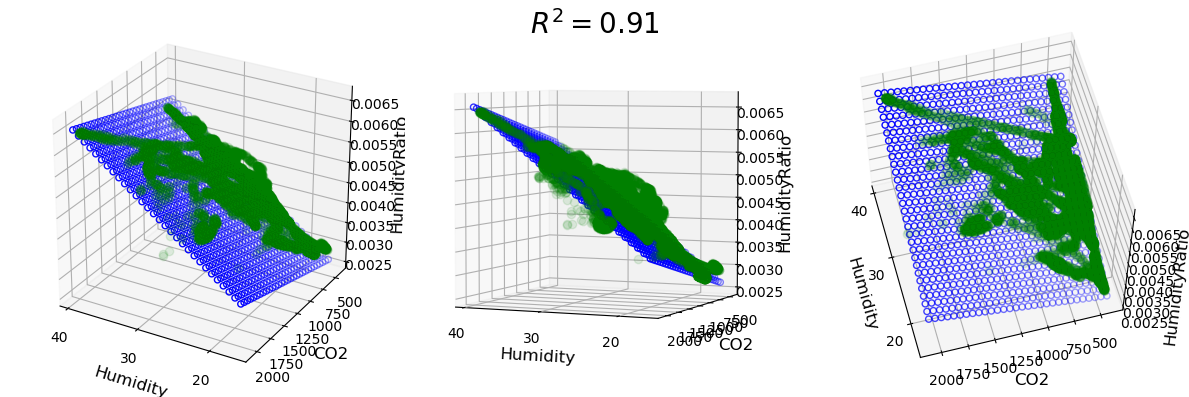

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################



X = df[['Humidity', 'CO2']].values.reshape(-1,2)
Y = df['HumidityRatio']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace( min(x),max(x), 30)   # range of porosity values
y_pred = np.linspace(min(y),max(y) , 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='green', zorder=15, linestyle='none', marker='o', alpha=0.1)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='blue')
    ax.set_xlabel('Humidity', fontsize=12)
    ax.set_ylabel('CO2', fontsize=12)
    ax.set_zlabel('HumidityRatio', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '',fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85,'', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df['1']=[1 for i in df.index]

X=np.array(df[['Temperature','Light','1']].values)
Y=np.array(df['CO2'])

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for age, weight, constant is: ", a)

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')
ax.legend()
plt.show()

In [ ]:
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train=np.array(df[['Temperature','Light']])
y_train=np.array(df['CO2'])

X_test=np.array(test[['Temperature','Light']])
y_test=np.array(test['CO2'])


l=len(Y_train)


fig = plt.figure ()
ax = fig.add_subplot (111, projection = '3d')
ax.scatter (X_train [:, 0], X_train [:, 1], y_train, marker = '.', color = 'red')
ax.set_xlabel ( "X1")
ax.set_ylabel ( "X2")
ax.set_zlabel ( "y")

model = sklearn.linear_model.LinearRegression ()
model.fit (X_train, y_train)
y_pred = model.predict (X_test)

print ("MAE: {}". format (np.abs (y_test-y_pred) .mean ()))
print ("RMSE: {}". format (np.sqrt (((y_test-y_pred) ** 2) .mean ())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile (np.arange (l), (l,1))
ys = np.tile (np.arange (l), (l,1)). T
zs = xs * coefs [0] + ys * coefs [1] + intercept
print ("Equazione: y = {: .2f} + {: .2f} x1 + {: .2f} x2" .format (intercept, coefs [0],
                                                          coefs [1]))

ax.plot_surface (xs, ys, zs, alpha = 0.5)
plt.show ()

MAE: 187.49055603171155
RMSE: 272.0596831222454


MAE: 331.2409988547172
RMSE: 410.6966025193401
Equazione: y = -1195.06 +  60.58 x1 +  59.50 x2


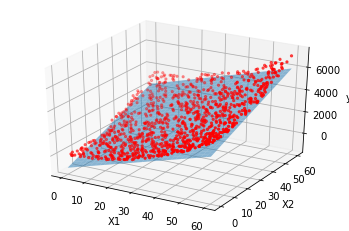

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train = np.random.rand (2000) .reshape (1000,2) * 60
y_train = (X_train [:, 0] ** 2) + (X_train [:, 1] ** 2)
X_test = np.random.rand (200) .reshape (100,2) * 20
y_test = (X_test [:, 0] ** 2) + (X_test [:, 1] ** 2)

fig = plt.figure ()
ax = fig.add_subplot (111, projection = '3d')
ax.scatter (X_train [:, 0], X_train [:, 1], y_train, marker = '.', color = 'red')
ax.set_xlabel ( "X1")
ax.set_ylabel ( "X2")
ax.set_zlabel ( "y")

model = sklearn.linear_model.LinearRegression ()
model.fit (X_train, y_train)
y_pred = model.predict (X_test)

print ("MAE: {}". format (np.abs (y_test-y_pred) .mean ()))
print ("RMSE: {}". format (np.sqrt (((y_test-y_pred) ** 2) .mean ())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile (np.arange (61), (61,1))
ys = np.tile (np.arange (61), (61,1)). T
zs = xs * coefs [0] + ys * coefs [1] + intercept
print ("Equazione: y = {: .2f} + {: .2f} x1 + {: .2f} x2" .format (intercept, coefs [0],
                                                          coefs [1]))

ax.plot_surface (xs, ys, zs, alpha = 0.5)
plt.show ()

In [116]:
X_train

array([[33.13948095,  9.8881372 ],
       [ 3.6682848 , 13.35836647],
       [14.68893767, 31.54651472],
       ...,
       [38.90363588, 48.77640185],
       [ 6.78711677, 55.0761415 ],
       [24.88610041, 11.92450872]])

# Linear Regression

**Dunque ho diverse train e test set** :<ul>
    <li> X_train, Xtest per fare predizione coi 4 attributi ['Temperature','Humidity','Light','CO2']
    <lI> X , Xt che hanno solo il main Component ottenuto da pca, hanno quindi una sola dimensione
        <li> trl, tel   dove la l sta per light, contengono solo l' attributo light

Per ogni regressore lineare ci sono tre regressioni:<ul>
    <li>la prima classificazione è presentata su tutti gli attributi numerici
    <li>La seconda sul primo componente principale ottenuto dalla pca (con annesso il grafico)
    <li>La terza su 'Light'  con annesso grafico


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[5.89622661e-07 7.10661388e-05]]
Intercept: 
 [0.00266715]


In [33]:
y_pred = reg.predict(X_test)

In [34]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.058
MSE: 0.000
MAE: 0.001


In [52]:
X.shape

(14384, 1)

In [53]:
reg = LinearRegression()
reg.fit(X.T.reshape(-1, 1), y_train)
y_pred = reg.predict(Xt.T.reshape(-1, 1))
regX=reg
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.227
MSE: 0.000
MAE: 0.001


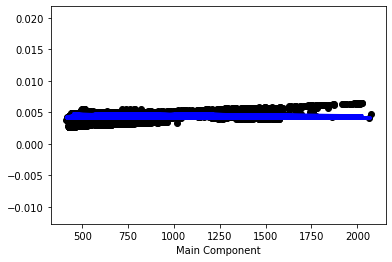

In [57]:
fig1, ax1 = plt.subplots()
ax1.scatter(Xt, y_test,  color='black')
ax1.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel("Main Component")
plt.show()

In [58]:
reg = LinearRegression()
reg.fit(trl.T.reshape(-1, 1), y_train)
y_pred = reg.predict(tel.T.reshape(-1, 1))
regT=reg
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.054
MSE: 0.000
MAE: 0.001


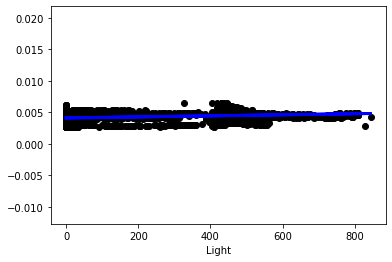

In [59]:
fig,ax1=plt.subplots()
ax1.scatter(tel, y_test,  color='black')
ax1.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel("Light")
plt.show()

##  LassoLarsCV    

Al posto del lasso.. fa la cross vaidation e utilizza algoritmo Lars che non si sa che cazzo sia ne lo si vuole scorprire

In [60]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [2.46988056e-04 1.49833598e-04 0.00000000e+00 6.89954499e-08]
Intercept: 
 -0.005126626385831981
R2: 0.997
MSE: 0.000
MAE: 0.000


In [61]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [1.17872412e-06]
Intercept: 
 0.003412705546007433
R2: 0.227
MSE: 0.000
MAE: 0.001


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


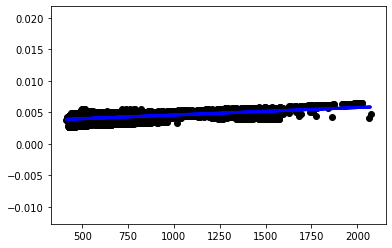

In [63]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [64]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [8.38622872e-07]
Intercept: 
 0.00412039461542884
R2: 0.054
MSE: 0.000
MAE: 0.001


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


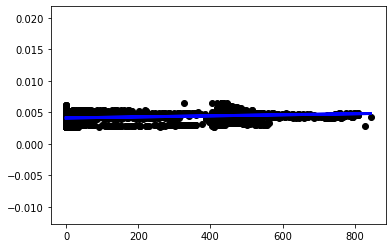

In [65]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

## Ridge

In [66]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [[2.50567818e-04 1.50834134e-04 8.43510956e-09 7.05778009e-08]]
Intercept: 
 [-0.00523136]
R2: 0.997
MSE: 0.000
MAE: 0.000


In [67]:
reg = Ridge()
reg.fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [[1.17872412e-06]]
Intercept: 
 [0.00341271]
R2: 0.227
MSE: 0.000
MAE: 0.001


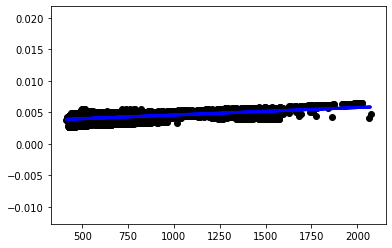

In [68]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [69]:
reg = Ridge()
reg.fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [[8.3862287e-07]]
Intercept: 
 [0.00412039]
R2: 0.054
MSE: 0.000
MAE: 0.001


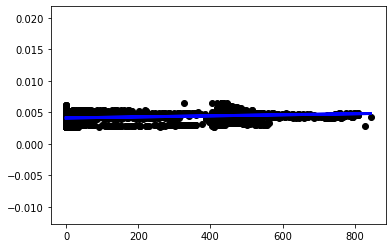

In [70]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()


## HUBER


In [71]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

In [72]:
huber = HuberRegressor().fit(X_train, y_train)
huber.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = huber.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [[8.3862287e-07]]
Intercept: 
 [0.00412039]
R2: 0.997
MSE: 0.000
MAE: 0.000


In [73]:
huber = HuberRegressor().fit(X, y_train)
huber.fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = huber.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [[8.3862287e-07]]
Intercept: 
 [0.00412039]
R2: 0.224
MSE: 0.000
MAE: 0.001


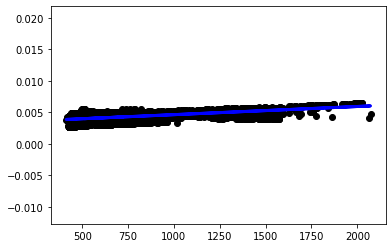

In [74]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [75]:
huber = HuberRegressor().fit(trl, y_train)
huber.fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = huber.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [[8.3862287e-07]]
Intercept: 
 [0.00412039]
R2: 0.052
MSE: 0.000
MAE: 0.001


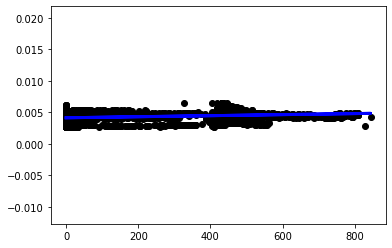

In [76]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

## Theil


Very bad results

In [77]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

reg = TheilSenRegressor(random_state=0).fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [3.67207665e-06]
Intercept: 
 0.0017208176590491776


In [78]:
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.801
MSE: 0.000
MAE: 0.001


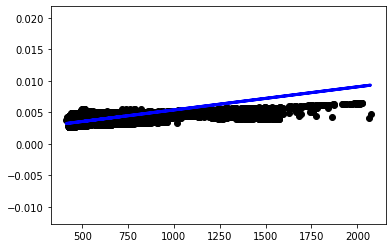

In [79]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     
plt.show()

#fa proprio cagare

## Bayesian Ridge

In [80]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge().fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [2.50603250e-04 1.50836250e-04 8.33470684e-09 7.05441390e-08]
Intercept: 
 -0.005232121973358719
R2: 0.997
MSE: 0.000
MAE: 0.000


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge().fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [1.17872412e-06]
Intercept: 
 0.00341270554613767
R2: 0.227
MSE: 0.000
MAE: 0.001


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


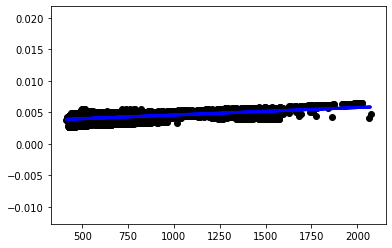

In [82]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [83]:
reg = BayesianRidge().fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [8.38622871e-07]
Intercept: 
 0.0041203946154772
R2: 0.054
MSE: 0.000
MAE: 0.001


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


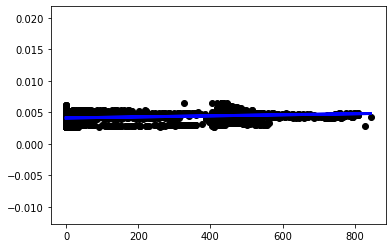

In [84]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

# Robust Linear Model


#Non funzione purtroppo il Ransac


import statsmodels.api as sm

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn import linear_model, datasets
from sklearn.linear_model import RANSACRegressor

In [266]:
X_train.shape


(14384, 5)


reg = linear_model.RANSACRegressor().fit(X_train, y_train)

# Classification

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [268]:
#which is the best feature??
#Si selezione il componente principale per la rappresentazione grafica
selected_columns=['Temperature','Humidity','Light','CO2','Holidays']
X = df[selected_columns]
X = PCA(n_components=1).fit_transform(X)
Xt = PCA(n_components=1).fit_transform(test[selected_columns])


In [269]:
#Tuttavia eseguiamo la classificazione con i nostri soliti 4 attributi

attributes = ['Temperature','Humidity','Light','CO2']
 
X_train =df[attributes].values
y_train=df['Occupancy'].values
X_test=test[attributes].values
y_test=test['Occupancy'].values

In [270]:
trl = df[['Light']].values  #uso doppia parentesi qudra per mantenere la forma desiderata 
tel =test[['Light']].values

In [271]:
print(len(X_train),len(y_train))
print(X_train.shape)

14384 14384
(14384, 4)


In [272]:
print(trl.shape,tel.shape)  
#senza le quadre prima, sarebbe venuta shape = (14348,19)

(14384, 1) (6168, 1)


**Dunque ho diverse train e test set** :<ul>
    <li> X_train, Xtest per fare predizione coi 4 attributi ['Temperature','Humidity','Light','CO2']<\lI>
    <lI> X , Xt che hanno solo il main Component ottenuto da pca, hanno quindi una sola dimensione<\li>
        <li> trl, tel   dove la l sta per light, contengono solo l' attributo light

C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


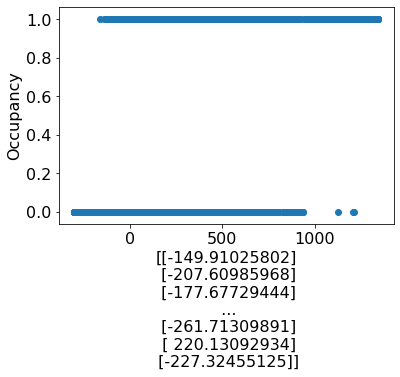

In [273]:
plt.scatter(X, y_train)
plt.xlabel(X, fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Logistic Regression

In [274]:
from sklearn.linear_model import LogisticRegressionCV

In [275]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='saga')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9828145265888456
F1-score [0.9887186  0.96394558]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.93      1.00      0.96      1421

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [276]:
clf = LogisticRegression(random_state=0, solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897859922178989
F1-score [0.99332839 0.9782233 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



Passo il classificatore su X ( il componente principale per poter fare il grafo)

In [277]:
from scipy.special import expit

clf = LogisticRegression(random_state=0, class_weight='balanced',solver='newton-cg')
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8850518806744487
F1-score [0.92314363 0.772099  ]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4747
           1       0.71      0.85      0.77      1421

    accuracy                           0.89      6168
   macro avg       0.83      0.87      0.85      6168
weighted avg       0.90      0.89      0.89      6168



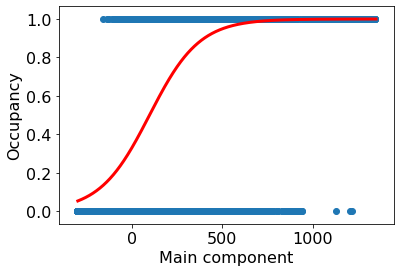

In [278]:
loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='red', linewidth=3)
plt.scatter(X, y_train)
plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [279]:
reg = LinearRegression()
reg.fit(X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

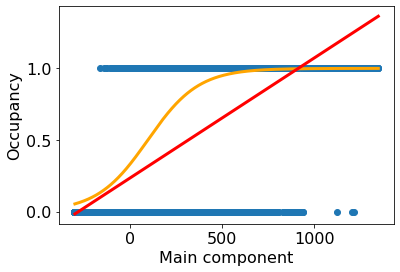

In [280]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_log=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [281]:
from scipy.special import expit

clf = LogisticRegression(random_state=0, class_weight='balanced',solver='newton-cg')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9824902723735408
F1-score [0.98850575 0.96326531]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.93      1.00      0.96      1421

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168



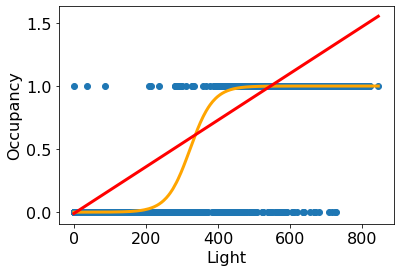

In [282]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_log=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## PERCEPTRON

In [304]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9777885862516212
F1-score [0.98536481 0.95394958]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4747
           1       0.91      1.00      0.95      1421

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168



In [305]:
from scipy.special import expit

clf = Perceptron(random_state=0)
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.18369001297016863
F1-score [0.30656934 0.00788177]
              precision    recall  f1-score   support

           0       0.44      0.23      0.31      4747
           1       0.01      0.01      0.01      1421

    accuracy                           0.18      6168
   macro avg       0.22      0.12      0.16      6168
weighted avg       0.34      0.18      0.24      6168



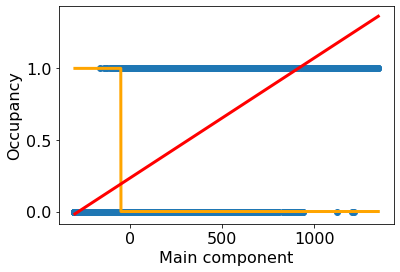

In [306]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_perceptron=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [307]:
from scipy.special import expit

clf = Perceptron(random_state=0)
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.916018158236057
F1-score [0.94229055 0.84583333]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4747
           1       0.73      1.00      0.85      1421

    accuracy                           0.92      6168
   macro avg       0.87      0.95      0.89      6168
weighted avg       0.94      0.92      0.92      6168



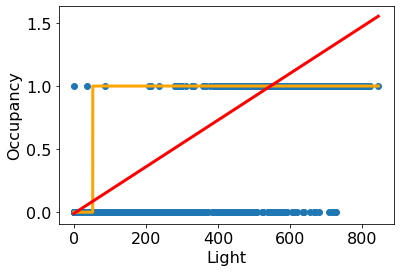

In [287]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_perceptron=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## RidgeClassifierCV

In [308]:
from sklearn.linear_model import RidgeClassifierCV
clf =RidgeClassifierCV(normalize=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9865434500648509
F1-score [0.99118802 0.97154611]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.95      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [309]:
from scipy.special import expit

clf = RidgeClassifierCV(class_weight='balanced')
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8868352788586251
F1-score [0.92521963 0.76748834]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4747
           1       0.73      0.81      0.77      1421

    accuracy                           0.89      6168
   macro avg       0.84      0.86      0.85      6168
weighted avg       0.89      0.89      0.89      6168



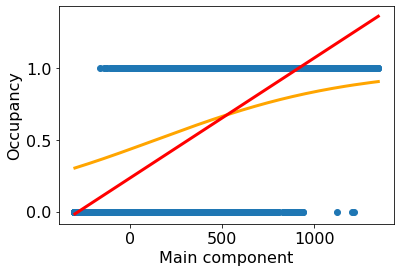

In [310]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_ridge=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [316]:
from scipy.special import expit

clf = RidgeClassifierCV(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9682230869001297
F1-score [0.97892926 0.93539881]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4747
           1       0.88      1.00      0.94      1421

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168



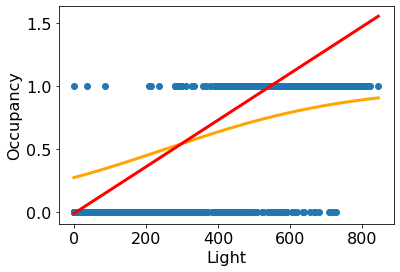

In [317]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_ridge=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## PassiveAggressiveClassifier

In [318]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf =PassiveAggressiveClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.98378728923476
F1-score [0.9893617  0.96594005]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.94      1.00      0.97      1421

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168



In [319]:
from scipy.special import expit

clf = PassiveAggressiveClassifier(class_weight='balanced') # gives worst results
clf.fit(X, y_train)
y_pred = clf.predict(Xt)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8553826199740596
F1-score [0.89721134 0.7561509 ]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4747
           1       0.62      0.97      0.76      1421

    accuracy                           0.86      6168
   macro avg       0.80      0.90      0.83      6168
weighted avg       0.90      0.86      0.86      6168



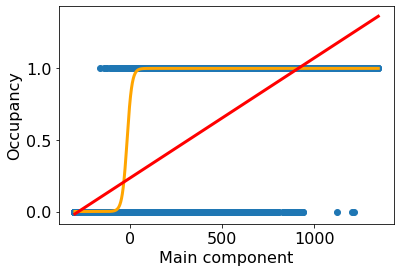

In [320]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_pa=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [321]:
from scipy.special import expit

clf = PassiveAggressiveClassifier(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9672503242542153
F1-score [0.97827022 0.93355263]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4747
           1       0.88      1.00      0.93      1421

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168



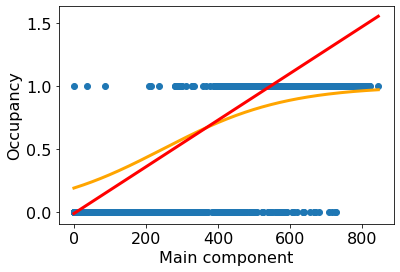

In [322]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_pa=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## SGDClassifier

In [323]:
from sklearn.linear_model import SGDClassifier
clf =SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897859922178989
F1-score [0.99332698 0.97823834]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [324]:
from scipy.special import expit

clf = SGDClassifier()
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8106355382619974
F1-score [0.88501674 0.46372819]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4747
           1       0.67      0.36      0.46      1421

    accuracy                           0.81      6168
   macro avg       0.75      0.65      0.67      6168
weighted avg       0.79      0.81      0.79      6168



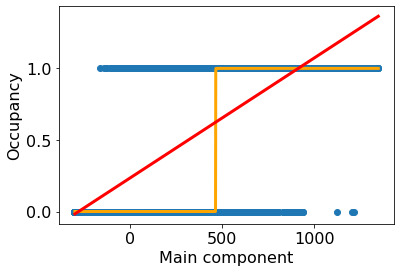

In [325]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_sgdc=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [326]:
from scipy.special import expit

clf = SGDClassifier(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9880025940337225
F1-score [0.99217759 0.97426982]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      0.99      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



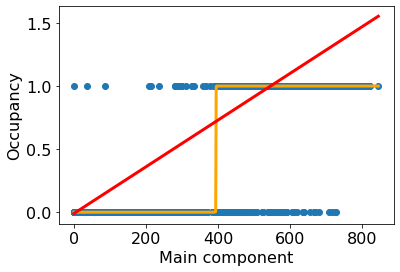

In [302]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_sgdc=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# EVALUATION

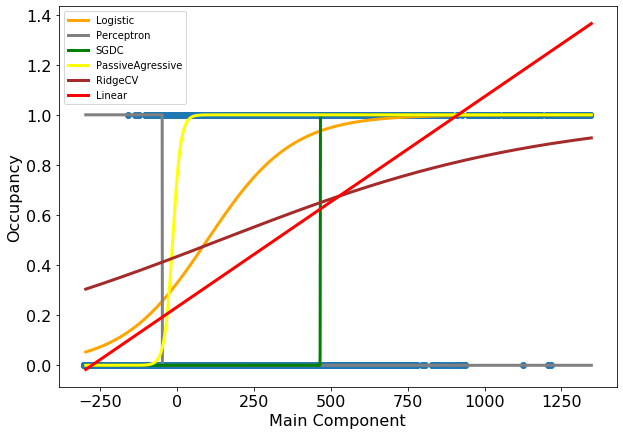

In [327]:
plt.figure(figsize=(10,7))

plt.scatter(X, y_train)


plt.plot(sorted(Xt), loss_pca_log, color='orange', linewidth=3)
plt.plot(sorted(Xt), loss_pca_perceptron, color='grey', linewidth=3)
plt.plot(sorted(Xt), loss_pca_sgdc, color='green', linewidth=3)
plt.plot(sorted(Xt), loss_pca_pa, color='yellow', linewidth=3)
plt.plot(sorted(Xt), loss_pca_ridge, color='brown', linewidth=3)

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('Main Component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

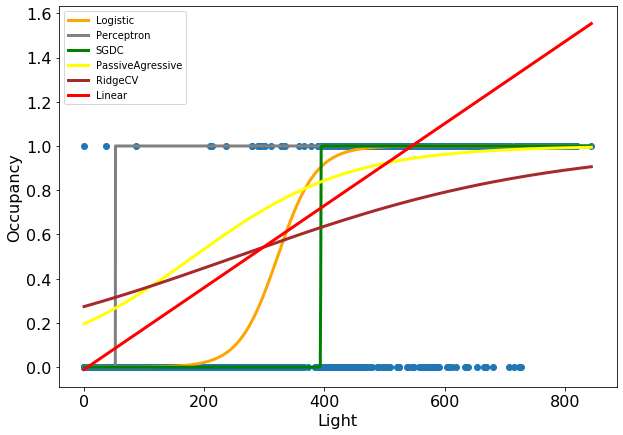

In [303]:
plt.figure(figsize=(10,7))
plt.scatter(trl, y_train)


plt.plot(sorted(tel), loss_l_log, color='orange', linewidth=3)
plt.plot(sorted(tel), loss_l_perceptron, color='grey', linewidth=3)
plt.plot(sorted(tel), loss_l_sgdc, color='green', linewidth=3)
plt.plot(sorted(tel), loss_l_pa, color='yellow', linewidth=3)
plt.plot(sorted(tel), loss_l_ridge, color='brown', linewidth=3)

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [167]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve



Otteniamo i 4 grafici roc curve lift etc.. su  logistic regresion

y_score è infatti stata salvata prima quando classifichevamo con il log lanciando
"y_score=clf.predict_proba(X_test)"

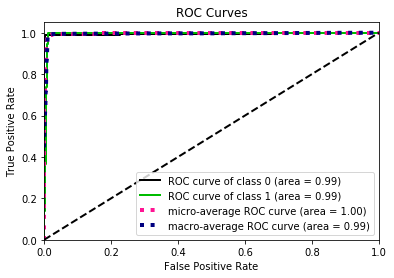

In [168]:
plot_roc(y_test, y_score)
plt.show()

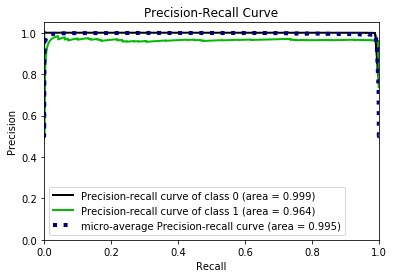

In [169]:
plot_precision_recall(y_test, y_score)
plt.show()

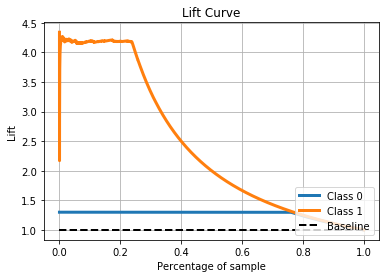

In [170]:
plot_lift_curve(y_test, y_score)
plt.show()

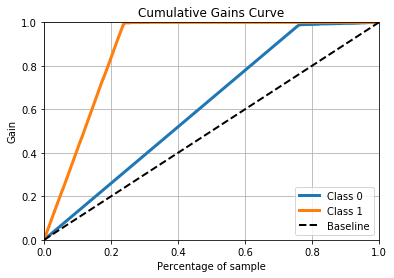

In [171]:
plot_cumulative_gain(y_test, y_score)
plt.show()